In [41]:
import pickle
import pandas as pd
import requests
import sddk

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import seaborn as sns

from sklearn.manifold import TSNE

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

In [42]:
# for exporting data to googlesheets/sciencedata
# (feel free to skip)

s = sddk.cloudSession("sciencedata.dk")
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict") # or load it from a local storage: json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
paul_results = gc.open_by_url("https://docs.google.com/spreadsheets/d/1h4M-gK9TPIfeTV528tUuPBfZF1wtcNCA10yIlJYqGTE/edit?usp=sharing")

endpoint variable has been configured to: https://sciencedata.dk/files/


In [43]:
data_1to3 = pickle.load(open("../data/large_files/embeddings_sents+bgs+tgs_ppmi2_1to3.pkl", "rb"))
data_4to5 = pickle.load(open("../data/large_files/embeddings_sents+bgs+tgs_ppmi2_4to5.pkl", "rb"))

In [44]:
data_1to3[-1]

,εἰμί,λέγω,θεός,οὗτος,γίγνομαι,λόγος,πᾶς,ἄνθρωπος,αὐτός,ἔχω,...,ἡσυχία,λαμπρότης,προνοέω,πανοῦργος,εἰλικρινής,ἀπέραντος,γήινος,φορά,ἔρομαι,ἀπαλλαξείω
εἰμί,1.000000,0.999288,0.999294,0.999722,0.999305,0.998164,0.999014,0.997279,0.998943,0.998773,...,0.474521,0.470391,0.445691,0.477666,0.532048,0.440152,0.459184,0.509297,0.421453,0.496696
λέγω,0.999288,1.000000,0.998873,0.999411,0.998778,0.997648,0.998308,0.996880,0.998803,0.998188,...,0.477698,0.467932,0.445569,0.479577,0.530469,0.436899,0.458371,0.504757,0.420709,0.494920
θεός,0.999294,0.998873,1.000000,0.999209,0.998947,0.997723,0.999193,0.997571,0.998519,0.998238,...,0.476814,0.472447,0.448881,0.477274,0.534937,0.440680,0.459301,0.507311,0.419764,0.498160
οὗτος,0.999722,0.999411,0.999209,1.000000,0.999138,0.998462,0.998884,0.997453,0.999089,0.998700,...,0.476563,0.469958,0.446959,0.479029,0.533680,0.436753,0.457072,0.508451,0.425188,0.497860
γίγνομαι,0.999305,0.998778,0.998947,0.999138,1.000000,0.997912,0.998775,0.997369,0.998252,0.998238,...,0.475307,0.471920,0.450354,0.478051,0.534432,0.445533,0.459473,0.514109,0.421363,0.503012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ἀπέραντος,0.440152,0.436899,0.440680,0.436753,0.445533,0.443051,0.448155,0.444374,0.443021,0.448384,...,0.572712,0.557937,0.556021,0.505647,0.583232,1.000000,0.538857,0.552904,0.438155,0.541146
γήινος,0.459184,0.458371,0.459301,0.457072,0.459473,0.463842,0.461795,0.467277,0.455580,0.466384,...,0.515431,0.565640,0.591590,0.536741,0.565233,0.538857,1.000000,0.534928,0.486651,0.569768
φορά,0.509297,0.504757,0.507311,0.508451,0.514109,0.515548,0.515383,0.522376,0.514686,0.512192,...,0.483606,0.517621,0.559529,0.546601,0.590235,0.552904,0.534928,1.000000,0.528138,0.619039
ἔρομαι,0.421453,0.420709,0.419764,0.425188,0.421363,0.429373,0.423847,0.430688,0.429064,0.429997,...,0.580804,0.431847,0.580482,0.556738,0.516872,0.438155,0.486651,0.528138,1.000000,0.638222


In [45]:
# export to gsheets
#set_with_dataframe(paul_results.add_worksheet("wordlist_1to3",1,1), pd.DataFrame(data_1to3[-1].columns))
#set_with_dataframe(paul_results.add_worksheet("wordlist_4to5",1,1), pd.DataFrame(data_4to5[-1].columns))

# Paul's nearest neighbours

In [46]:
n = 20
paul_nn = {}
for data, label in zip([data_1to3, data_4to5], ["1-3 CE", "4-5 CE"]):
    data_sorted = data[-1].sort_values("Παῦλος", ascending=False)
    paul_nn[label + " Παῦλος NNs"] = data_sorted.index.tolist()[1:n+1]
    paul_nn[label + " Παῦλος CoS."] = data_sorted["Παῦλος"].tolist()[1:n+1]

In [25]:
paul_nn_df = pd.DataFrame(paul_nn)
paul_nn_df

,1-3 CE Παῦλος NNs,1-3 CE Παῦλος CoS.,4-5 CE Παῦλος NNs,4-5 CE Παῦλος CoS.
0,ἀπόστολος,0.905679,ἀπόστολος,0.856147
1,ἀκούω,0.877988,αἵρεσις,0.852333
2,εὐαγγέλιον,0.877466,δέχομαι,0.850412
3,ἐκκλησία,0.874914,ὕστερος,0.847893
4,πιστεύω,0.873257,διδάσκω,0.843779
5,ἔθνος,0.871361,πίστις,0.842075
6,πίστις,0.871282,πρέσβυς,0.841846
7,Χριστός,0.868395,ἐπίσκοπος,0.841547
8,τόπος,0.867992,δόξα,0.841499
9,σωτήρ,0.867936,ἀδελφός,0.841446


In [48]:
#set_with_dataframe(paul_results.worksheet("paul_20NN"), paul_nn_df)

# Manually anotated words

In [51]:
coding_words = get_as_dataframe(paul_results.worksheet("coding_words_15"))
coding_words[:15]

,jewishness,martyrdom,christology&mariology,eschatology,ecclesiology,Unnamed: 5
0,Ἰουδαῖος,μαρτυρία,υἱός,κρίσις,ἐκκλησία,NaN
1,συνέδριον,διώκω,κύριος,ἀπώλεια,διάκονος,NaN
2,Ἑβραῖος,πάθη,μόνος,ἀποκάλυψις,ἀνάθεμα,NaN
3,Ἱεροσόλυμα,μάστιξ,Χριστός,ἀποκαλύπτω,ἐπίσκοπος,NaN
4,ἱερεύς,δεσμωτήριον,Ἰησοῦς,παρουσία,πρεσβύτης,NaN
5,θυσία,φεύγω,γεννάω,θρόνος,κοινωνέω,NaN
6,νομός,ἀποθνῄσκω,γωνία,ἄγγελος,κοινωνία,NaN
7,συναγωγή,μάχη,ἀγέννητος,στοιχεῖον,αἵρεσις,NaN
8,διαθήκη,φεύγω,σώζω,ὀργή,τάξις,NaN
9,πάσχα,ἀποθνῄσκω,ὑπόστασις,σημεῖον,χάρισμα,NaN


# Embeddings plots

In [52]:
def get_tsne_coors(svd_matrix, perplexity=18):
    # inverse similarity to distance
    #data = (1 - sim_matrix) / 1
    words = svd_matrix.index
    #data.round(5)
    # tSNE to project all words into a 2-dimensional space
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, metric='cosine', n_iter=1000) # dissimilarity="precomputed",
    #tsne = TSNE(n_components=2, random_state=42, perplexity=18, metric='precomputed', n_iter=5000) # dissimilarity="precomputed",
    pos = tsne.fit_transform(svd_matrix) # project all points into space
    xs, ys = pos[:, 0], pos[:, 1]
    # extract minimal and maximal values
    minmax = [pos[:, 0].min(), pos[:, 0].max(), pos[:, 1].min(), pos[:, 1].max()]
    # normalize on scale from 0 to 1
    xs = (xs - minmax[0]) / (minmax[1] - minmax[0])
    ys = (ys - minmax[2]) / (minmax[3] - minmax[2])
    return xs, ys, words

In [53]:
nns = paul_nn_df["1-3 CE Παῦλος NNs"].tolist()
nns

['ἀπόστολος',
 'εὐαγγέλιον',
 'ἐκκλησία',
 'ἀκούω',
 'πιστεύω',
 'πίστις',
 'ἔθνος',
 'ἅγιος',
 'Χριστός',
 'διδάσκω',
 'Ἰησοῦς',
 'τόπος',
 'δίδωμι',
 'Ἰουδαῖος',
 'οἶδα',
 'σωτήρ',
 'ἴδιος',
 'ἐθέλω',
 'προφήτης',
 'πνεῦμα']

In [54]:
def df_slice(df, n):
    return df[:n][df.columns[:n]]

In [55]:
df_slice(data_1to3[-2], 10)

,0,1,2,3,4,5,6,7,8,9
εἰμί,27.505202,12.725564,0.076257,-2.899845,1.125082,-1.198353,3.813264,0.119144,-1.128759,-1.268995
λέγω,27.185300,12.460496,-0.352307,-2.321114,1.117092,-1.658108,3.742822,0.242497,-1.246499,-1.203769
θεός,27.357309,12.569919,-0.149965,-2.747634,0.660577,-0.959460,3.863886,-0.316158,-1.118894,-1.104307
οὗτος,27.088407,12.470312,0.226376,-2.551057,1.004971,-1.429253,3.750075,0.096751,-1.074427,-1.264965
γίγνομαι,26.737900,12.161963,-0.101326,-2.465614,1.097644,-0.990025,3.500486,-0.152073,-1.096147,-1.428172
λόγος,26.500900,11.869562,0.711747,-2.034987,0.828356,-0.999153,3.575785,0.354514,-0.970561,-1.007865
πᾶς,26.476127,11.915768,0.068055,-2.735060,0.690827,-0.920652,3.387219,-0.185860,-0.832268,-1.198723
ἄνθρωπος,26.129449,11.420526,0.624415,-2.450602,0.517218,-0.965954,2.824123,-0.100231,-1.181260,-1.018647
αὐτός,26.165362,11.831681,0.207492,-2.698752,0.959348,-1.366085,3.247198,0.061143,-0.960006,-1.310392
ἔχω,26.208201,11.742967,0.136057,-2.689673,0.821038,-0.855773,3.299839,0.531299,-0.907630,-0.971143


In [56]:
def draw_special_words(wordlist, color):
    color_idx = [word[0] for word in enumerate(words) if word[1] in wordlist]
    for x,y,w in zip(xs[color_idx], ys[color_idx] - 0.003, words[color_idx]):
        ax.text(x,y,w, horizontalalignment='center', fontsize=5, color=color, zorder=3)

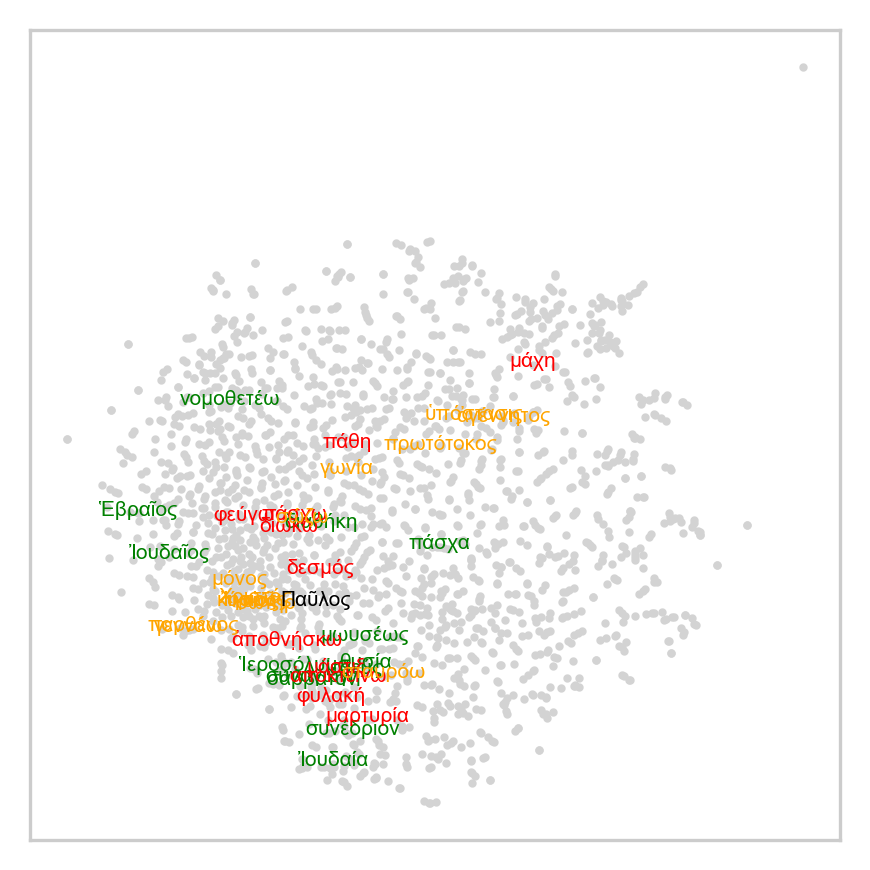

In [61]:
n = 2000
n_coded = 15
xs, ys, words = get_tsne_coors(df_slice(data_1to3[-2], n), perplexity=20)

fig, ax = plt.subplots(figsize=(3, 3), dpi=300, tight_layout=True)

# paul
paul_idx = [word[0] for word in enumerate(words) if word[1] == "Παῦλος"]
ax.text(xs[paul_idx], ys[paul_idx], words[paul_idx][0], horizontalalignment='center', fontsize=5, color="black", zorder=4)

# all words as dots if not in lists
dots_idx = [word[0] for word in enumerate(words) if word[1] not in []]
ax.scatter(xs[dots_idx], ys[dots_idx], s=1, color="lightgrey", zorder=1)

# jewishness
#green_idx = [word[0] for word in enumerate(words) if word[1] in coding_words["jewish devotion"].tolist()[:n_coded]]
#for x,y,w in zip(xs[green_idx], ys[green_idx] - 0.003, words[green_idx]):
#    ax.text(x,y,w, horizontalalignment='center', fontsize=5, color="green", zorder=3)
for col, color in zip(coding_words.columns[:3], ["green", "red", "orange", "blue", "purple", "pink"][:3]):
    wordlist = coding_words[col].tolist()[:n_coded]
    draw_special_words(wordlist, color)


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

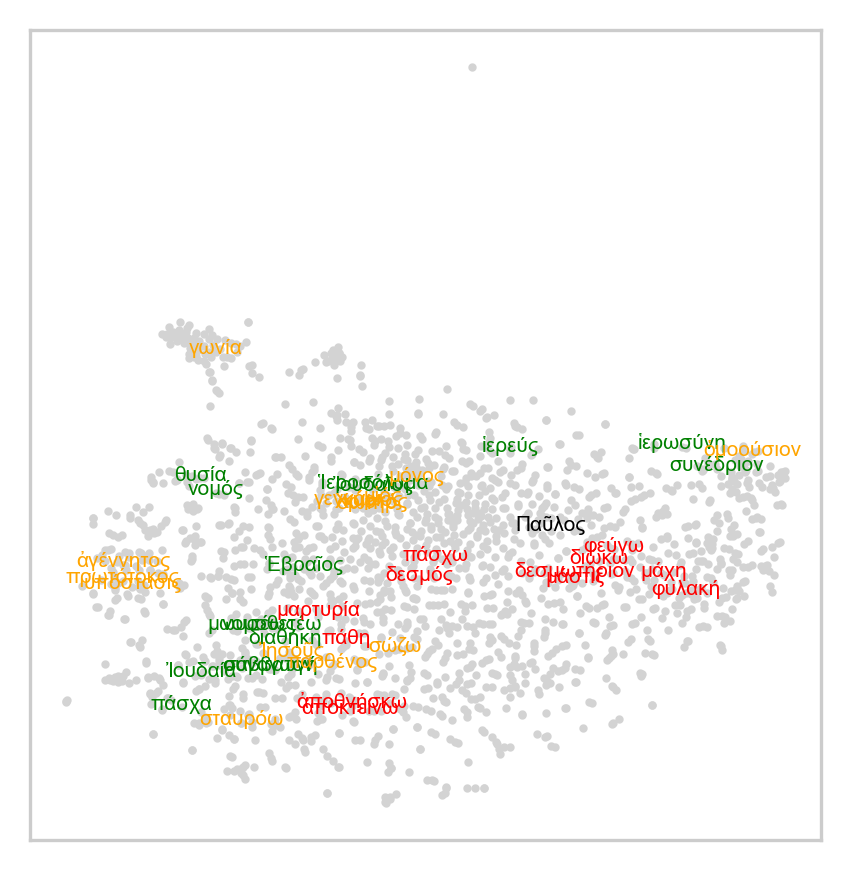

In [62]:
n = 2000
n_coded = 15
xs, ys, words = get_tsne_coors(df_slice(data_4to5[-2], n), perplexity=20)

fig, ax = plt.subplots(figsize=(3, 3), dpi=300, tight_layout=True)

# paul
paul_idx = [word[0] for word in enumerate(words) if word[1] == "Παῦλος"]
ax.text(xs[paul_idx], ys[paul_idx], words[paul_idx][0], horizontalalignment='center', fontsize=5, color="black", zorder=4)

# all words as dots if not in lists
dots_idx = [word[0] for word in enumerate(words) if word[1] not in []]
ax.scatter(xs[dots_idx], ys[dots_idx], s=1, color="lightgrey", zorder=1)

# jewishness
#green_idx = [word[0] for word in enumerate(words) if word[1] in coding_words["jewish devotion"].tolist()[:n_coded]]
#for x,y,w in zip(xs[green_idx], ys[green_idx] - 0.003, words[green_idx]):
#    ax.text(x,y,w, horizontalalignment='center', fontsize=5, color="green", zorder=3)
for col, color in zip(coding_words.columns[:3], ["green", "red", "orange", "blue", "purple", "pink"][:3]):
    wordlist = coding_words[col].tolist()[:n_coded]
    draw_special_words(wordlist, color)


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)